In [ ]:
%run "../../../common/0_notebooks_base_setup.py"   

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles para resolver los ejercicios de esta práctica.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [4]:
import numpy as np

# local:
data_location = '../Data/sales_data_sample_excercise.csv'

In [5]:
data = np.genfromtxt(data_location, skip_header=1, delimiter='\t', dtype=str)
data

array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

## Ejercicio 2

La función `distribution_plotter` grafica los datos que recibe como parámetro en una instancia de numpy array

Graficar los precios de ventas en tres países. ¿Qué pueden decir respecto a sus distribuciones?

Comparar las distribuciones con la de los precios de ventas sin distinguir por paises

In [6]:
import seaborn as sns

def distribution_plotter(data, label, bin_width=500):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

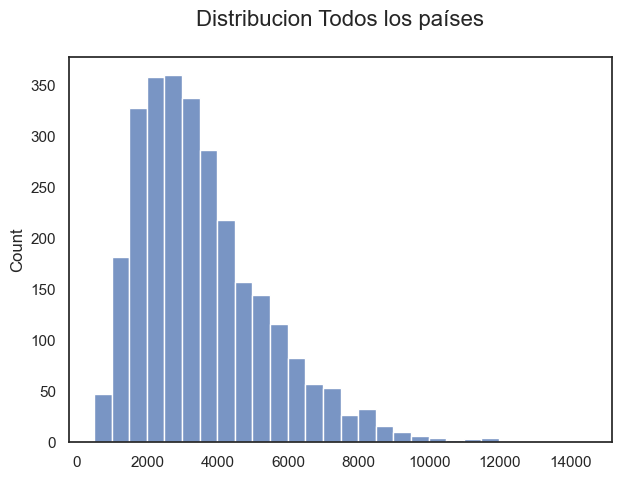

In [9]:
sales =  data[:, 1].astype(float)

distribution_plotter(sales, 'Todos los países')

In [10]:
country_vector = data[:, 5]

paises_unicos = np.unique(country_vector)
print(paises_unicos)

['Australia' 'Austria' 'Belgium' 'Canada' 'Denmark' 'Finland' 'France'
 'Germany' 'Ireland' 'Italy' 'Japan' 'Norway' 'Philippines' 'Singapore'
 'Spain' 'Sweden' 'Switzerland' 'UK' 'USA']


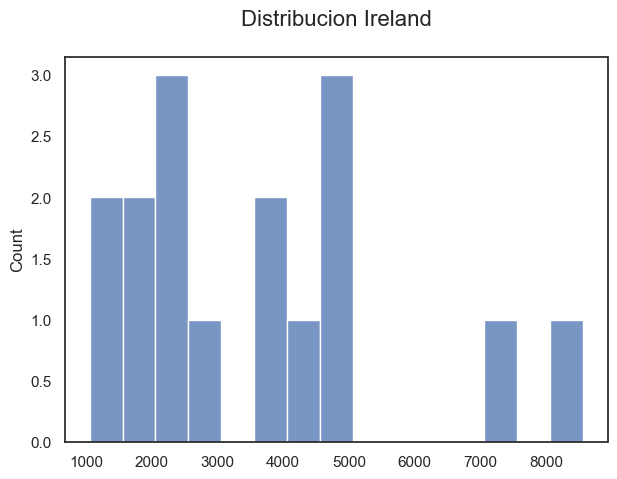

In [11]:
ventas_Ireland_mask = country_vector == 'Ireland'
precios_Ireland = sales[ventas_Ireland_mask]
distribution_plotter(precios_Ireland, 'Ireland')

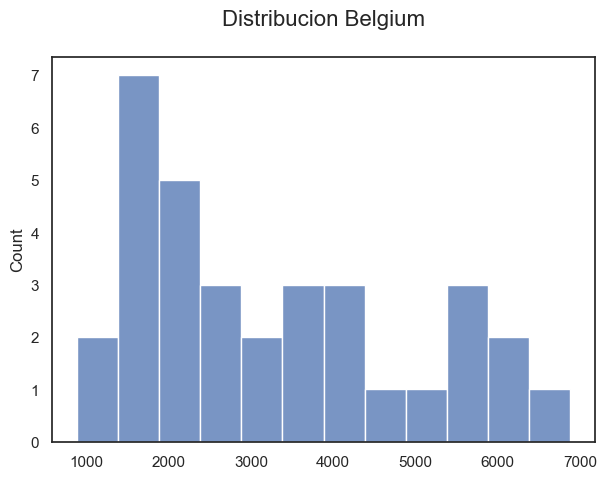

In [12]:
ventas_Belgium_mask = country_vector == 'Belgium'
precios_Belgium = sales[ventas_Belgium_mask]
distribution_plotter(precios_Belgium, 'Belgium')

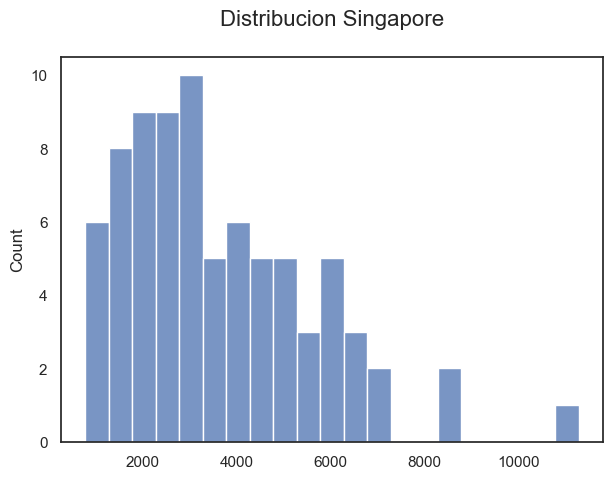

In [13]:
ventas_Singapore_mask = country_vector == 'Singapore'
precios_Singapore = sales[ventas_Singapore_mask]
distribution_plotter(precios_Singapore, 'Singapore')

## Ejercicio 3
Para los tres países del punto anterior, calcular con dos decimales
* Media
* Mediana
* Rango
* Desvío estandard

Repetir para todos los datos de ventas sin distinguir por país.

¿Qué conclusiones pueden sacar respecto a la información que brinda cada una de estas medidas en este caso particular?

In [14]:
media_Singapore = np.mean(precios_Singapore)
mediana_Singapore = np.median(precios_Singapore)
rango_Singapore = np.max(precios_Singapore) - np.min(precios_Singapore)
des_Singapore = np.std(precios_Singapore)

media_Singapore, mediana_Singapore, rango_Singapore, des_Singapore

(3651.752025316456, 3127.88, 10207.86, 2006.4708345903562)

In [15]:
media_Ireland = np.mean(precios_Ireland)
mediana_Ireland = np.median(precios_Ireland)
rango_Ireland = np.max(precios_Ireland) - np.min(precios_Ireland)
des_Ireland = np.std(precios_Ireland)

media_Ireland, mediana_Ireland, rango_Ireland, des_Ireland

(3609.776875, 3419.965, 7201.6, 2009.570147092155)

In [16]:
media_Belgium = np.mean(precios_Belgium)
mediana_Belgium = np.median(precios_Belgium)
rango_Belgium = np.max(precios_Belgium) - np.min(precios_Belgium)
des_Belgium = np.std(precios_Belgium)

media_Belgium, mediana_Belgium, rango_Belgium, des_Belgium

(3285.2309090909093, 2796.12, 5923.2300000000005, 1595.301263237465)

In [17]:
media_total = np.mean(sales)
mediana_total = np.median(sales)
rango_total = np.max(sales) - np.min(sales)
des_total = np.std(sales)

media_total, mediana_total, rango_total, des_total

(3553.889071909316, 3184.8, 13600.67, 1841.5388520655404)

Podemos decir que paises como Irlanda o Singapur estan por encima de la edia de todos los paises, ademas Belgica esta bastante por debajo